<a href="https://colab.research.google.com/github/chaeyh4/Medical_AI_Idea/blob/main/VID10_segmentation_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 정보 추출 과정

In [ ]:
import pandas as pd

In [ ]:
VID10 = pd.read_csv('/content/drive/MyDrive/Medical_AI/VID10_result_segmentation.csv')

In [ ]:
VID10.head()

,File_Name,Result_Segmentation
0,0,"1 Abdominal Wall, 1 Fat, 1 L-hook Electrocaute..."
1,1,"1 Abdominal Wall, 1 Fat, 1 L-hook Electrocaute..."
2,2,"1 Abdominal Wall, 2 Fats, 1 Gallbladder, 1 L-h..."
3,3,"1 Abdominal Wall, 1 L-hook Electrocautery, 1 L..."
4,4,"1 Abdominal Wall, 1 Grasper, 1 L-hook Electroc..."


In [ ]:
VID10.loc[0]['Result_Segmentation'].split(',')

['1 Abdominal Wall', ' 1 Fat', ' 1 L-hook Electrocautery', ' 1 Liver', ' ']

In [ ]:
VID10['Result_Segmentation']

0       1 Abdominal Wall, 1 Fat, 1 L-hook Electrocaute...
1       1 Abdominal Wall, 1 Fat, 1 L-hook Electrocaute...
2       1 Abdominal Wall, 2 Fats, 1 Gallbladder, 1 L-h...
3       1 Abdominal Wall, 1 L-hook Electrocautery, 1 L...
4       1 Abdominal Wall, 1 Grasper, 1 L-hook Electroc...
                              ...                        
1745                                         no detection
1746                                         no detection
1747                                         no detection
1748                                         no detection
1749                                         no detection
Name: Result_Segmentation, Length: 1750, dtype: object

In [ ]:
class_name = ['Abdominal Wall',
'Blood',
'Connective Tissue',
'Cystic Duct',
'Fat',
'Gallbladder',
'Gastrointestinal Tract',
'Grasper',
'Hepatic Vein',
'L-hook Electrocautery',
'Liver',
'Liver Ligament',
'null']

In [ ]:
for name in class_name:
  VID10[name] = 0

In [ ]:
for i in range(VID10.shape[0]):
    for name in class_name:
        if name in VID10.loc[i, 'Result_Segmentation']:
            VID10.loc[i, name] = 1

In [ ]:
VID10.rename(columns={"File_Name": "file_num"}, inplace=True)

In [ ]:
VID10.to_csv('/content/drive/MyDrive/Medical_AI/VID10_result.csv', index=False)

In [ ]:
VID10_06 = pd.read_csv('/content/VID10_result_0.6.csv')

In [ ]:
VID10_06

,file_num,tools
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,"1 grasper,"
...,...,...
1745,1745,NaN
1746,1746,NaN
1747,1747,NaN
1748,1748,NaN


In [ ]:
VID10_concat = pd.merge(VID10_06, VID10)

In [ ]:
VID10_concat = VID10_concat.replace({'Result_Segmentation' : 'no detection'}, None)

In [ ]:
VID10_concat

,file_num,tools,Result_Segmentation,Abdominal Wall,Blood,Connective Tissue,Cystic Duct,Fat,Gallbladder,Gastrointestinal Tract,Grasper,Hepatic Vein,L-hook Electrocautery,Liver,Liver Ligament,null
0,0,NaN,"1 Abdominal Wall, 1 Fat, 1 L-hook Electrocaute...",1,0,0,0,1,0,0,0,0,1,1,0,0
1,1,NaN,"1 Abdominal Wall, 1 Fat, 1 L-hook Electrocaute...",1,0,0,0,1,0,0,0,0,1,1,0,0
2,2,NaN,"1 Abdominal Wall, 2 Fats, 1 Gallbladder, 1 L-h...",1,0,0,0,1,1,0,0,0,1,1,0,0
3,3,NaN,"1 Abdominal Wall, 1 L-hook Electrocautery, 1 L...",1,0,0,0,0,0,0,0,0,1,1,0,0
4,4,"1 grasper,","1 Abdominal Wall, 1 Grasper, 1 L-hook Electroc...",1,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1745,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1746,1746,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1747,1747,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1748,1748,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
VID10_concat_result = VID10_concat.dropna(subset=['tools','Result_Segmentation'])

In [ ]:
VID10_concat_result.reset_index(inplace=True)

In [ ]:
indices_to_drop = []

for i in range(VID10_concat_result.shape[0] - 1):
    if (
        (VID10_concat_result.loc[i, 'tools'] == VID10_concat_result.loc[i + 1, 'tools']) or
        ((VID10_concat_result.loc[i, 'Abdominal Wall'] == VID10_concat_result.loc[i + 1, 'Abdominal Wall'])and
         (VID10_concat_result.loc[i, 'Blood'] == VID10_concat_result.loc[i + 1, 'Blood'])and
         (VID10_concat_result.loc[i, 'Connective Tissue'] == VID10_concat_result.loc[i + 1, 'Connective Tissue'])and
         (VID10_concat_result.loc[i, 'Cystic Duct'] == VID10_concat_result.loc[i + 1, 'Cystic Duct'])and
         (VID10_concat_result.loc[i, 'Fat'] == VID10_concat_result.loc[i + 1, 'Fat'])and
         (VID10_concat_result.loc[i, 'Gallbladder'] == VID10_concat_result.loc[i + 1, 'Gallbladder'])and
         (VID10_concat_result.loc[i, 'Gastrointestinal Tract'] == VID10_concat_result.loc[i + 1, 'Gastrointestinal Tract'])and
         (VID10_concat_result.loc[i, 'Hepatic Vein'] == VID10_concat_result.loc[i + 1, 'Hepatic Vein'])and
         (VID10_concat_result.loc[i, 'Liver'] == VID10_concat_result.loc[i + 1, 'Liver'])and
         (VID10_concat_result.loc[i, 'Liver Ligament'] == VID10_concat_result.loc[i + 1, 'Liver Ligament']))
    ):
        indices_to_drop.append(i)

VID10_concat_result.drop(indices_to_drop, axis=0, inplace=True)


<ipython-input-122-603567ec2b11>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VID10_concat_result.drop(indices_to_drop, axis=0, inplace=True)


In [ ]:
VID10_concat_result.reset_index(inplace=True)

In [ ]:
VID10_concat_result.drop(['level_0','index'],axis=1,inplace=True)

<ipython-input-127-c468e47e35be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VID10_concat_result.drop(['level_0','index'],axis=1,inplace=True)


In [ ]:
VID10_concat_result

,file_num,tools,Result_Segmentation,Abdominal Wall,Blood,Connective Tissue,Cystic Duct,Fat,Gallbladder,Gastrointestinal Tract,Grasper,Hepatic Vein,L-hook Electrocautery,Liver,Liver Ligament,null
0,4,"1 grasper,","1 Abdominal Wall, 1 Grasper, 1 L-hook Electroc...",1,0,0,0,0,0,0,1,0,1,0,0,0
1,5,"1 hook,","2 Abdominal Walls, 2 Fats, 2 Graspers, 1 L-hoo...",1,0,0,0,1,0,0,1,0,1,1,0,0
2,9,"1 grasper, 1 hook,","3 Abdominal Walls, 2 Fats, 1 Gallbladder, 2 Gr...",1,0,0,0,1,1,0,1,0,1,1,0,0
3,16,"2 graspers, 1 hook,","3 Abdominal Walls, 1 Fat, 1 Gallbladder, 2 Gra...",1,0,0,0,1,1,0,1,0,0,1,0,0
4,50,"1 grasper,","2 Abdominal Walls, 2 Graspers, 1 Liver,",1,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1690,"1 grasper,","2 Abdominal Walls, 1 Grasper, 1 L-hook Electro...",1,0,0,0,0,0,0,1,0,1,1,0,0
292,1692,"2 graspers, 1 scissor,","1 Abdominal Wall, 2 Graspers,",1,0,0,0,0,0,0,1,0,0,0,0,0
293,1703,"1 grasper,","1 Abdominal Wall,",1,0,0,0,0,0,0,0,0,0,0,0,0
294,1716,"1 grasper,","2 Abdominal Walls, 1 Grasper, 1 L-hook Electro...",1,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
VID10_concat_result.to_csv('/content/drive/MyDrive/Medical_AI/VID10_concat_result.csv', index=False)

## 사진 접근하는법

In [ ]:
# 최종 추출한 image 정보 불러오기
VID10_concat_result = pd.read_csv('/content/drive/MyDrive/Medical_AI/VID10_concat_result.csv')

In [ ]:
# 폴더 경로
image_folder = '/content/drive/MyDrive/Medical_AI/VID10_result'

In [ ]:
num = 0 #원하는 index
str_num = str(VID10_concat_result.loc[num]['file_num'])
str_len = len(str_num)
max_len = 6
image_name = (max_len-str_len)*'0'+str_num
image_path = image_folder+'/'+image_name+'.png'
image_path

'/content/drive/MyDrive/Medical_AI/VID10_result/000004.png'

## 이미지 출력

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

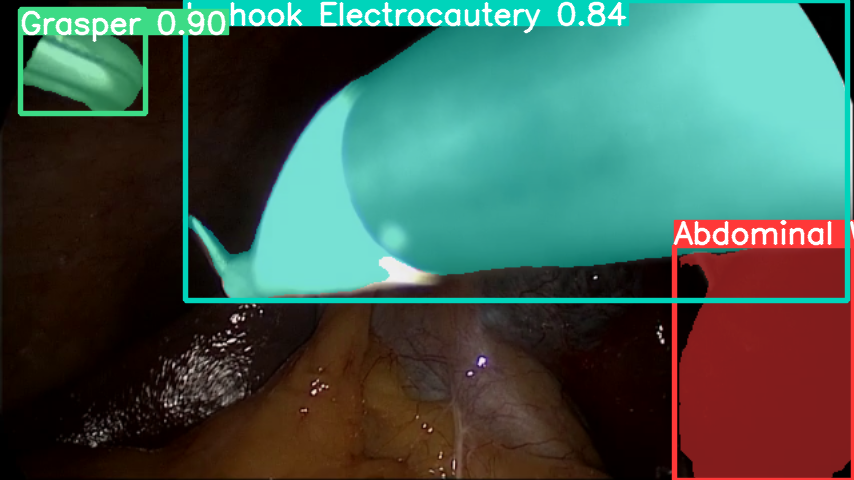

In [ ]:
img = cv2.imread(image_path)
cv2_imshow(img)

# 분석 이미지

## target별 timestamp

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class_name = ['Abdominal Wall',
'Connective Tissue',
'Fat',
'Gallbladder',
'Gastrointestinal Tract',
'Liver',]

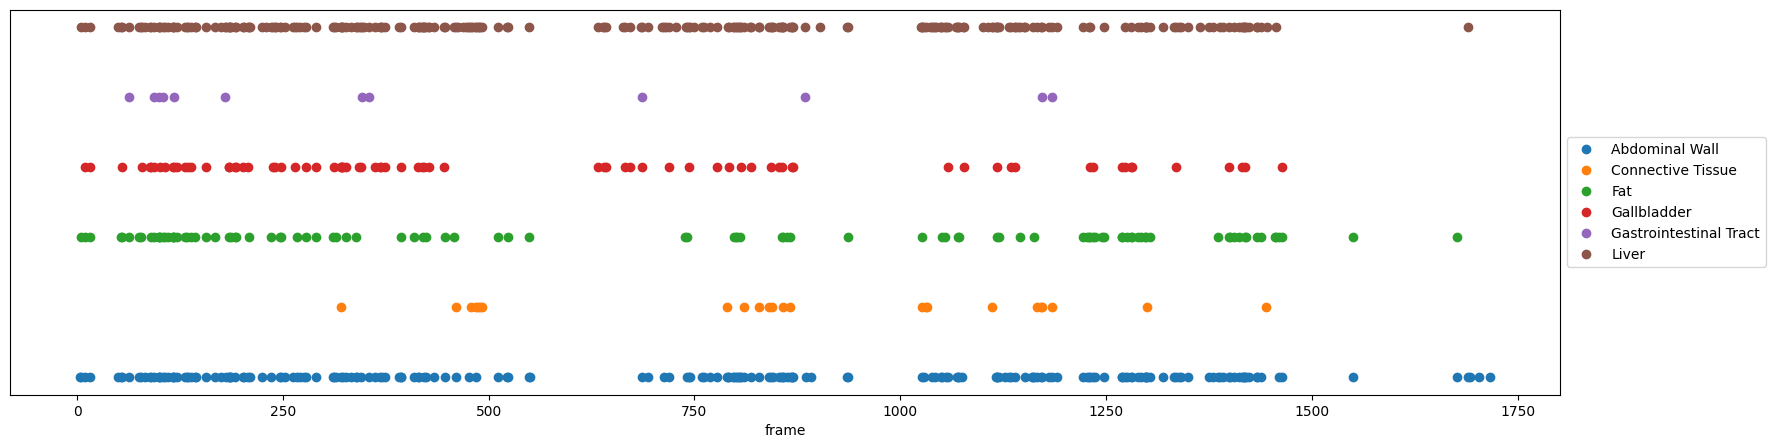

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(len(class_name)):
  plt.plot(VID10_concat_result[VID10_concat_result[class_name[i]] == 1]['file_num'],VID10_concat_result[VID10_concat_result[class_name[i]] == 1][class_name[i]]*(1+0.1*i), 'o',label=class_name[i])
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
plt.xlabel('frame')
plt.gca().axes.yaxis.set_visible(False)
plt.show()